# Analyse en composante principale (ACP)

L'ACP est une technique de **réduction de dimensionnalité** qui permet de **projeter des données multidimensionnelles sur un nouvel espace de variables** (tout en préservant un maximum l'information contenue dans les données)

L'ACP permet de **déterminer les variables qui ont le plus d'impact sur la variable des données**

* Etapes : 

1. **Standardisation** : les ``variables`` sont ``centrées autour de leur moyenne et divisées par leur écart-type`` afin d'obtenir une variance comparable entre les variables

2. **Matrice de covariance** : calculée à partir des données standardisées - permet de ``mesurer la corrélation entre les variables

3. **Calcul des composantes principales** : les composantes principales sont obtenues en diagonalisant la matrice de covariance. La 1ère composante est celle qui explique la plus grande proportion de la variance des données.


4. **Projection des données sur les axes principaux** : les données sont projetées sur les axes principaux, ce qui permet de réduire la dimensionnalité

5. **Choix du nombre d'axes principaux** : le nombre d'axes principaux à retenir dépend de la proportion de variance expliquée. On peut choisir le nombre d'axes principaux en se basant sur un critère de variance expliquée.

# Exemple

On étudie un ensemble de données de fleurs contenant les variables : 
* longueur du pétale
* largeur du pétale
* longueur du sépale
* largeur du sépale

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Importation des données
iris = load_iris()

# Sélection des variables
X = iris.data

# Standardisation des données
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

2. PCA

In [2]:
from sklearn.decomposition import PCA

# Création d'un objet PCA
pca = PCA()

# Application de la PCA sur les données standardisées
pca.fit(X_std)

# Projection des données sur les deux premiers axes principaux
X_pca = pca.transform(X_std)[:, :2]

3. Affichage + Interprétation des résultats

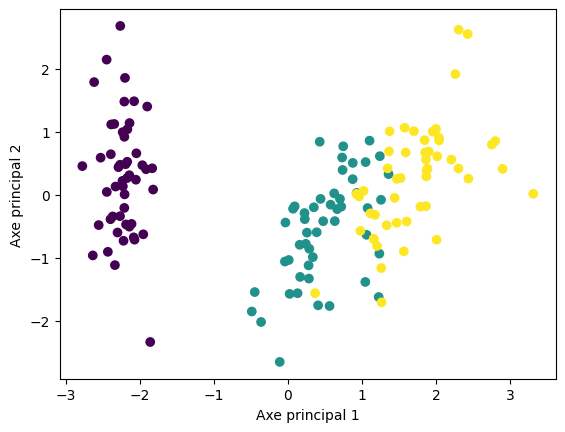

In [3]:
import matplotlib.pyplot as plt

# Visualisation des données projetées sur les deux premiers axes principaux
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Axe principal 1')
plt.ylabel('Axe principal 2')
plt.show()

* Les données sont séparées en trois groupes distincts, ce qui corresponds aux trois types de fleurs dans l'ensemble des données.

# Variance expliquée

In [4]:
import numpy as np

# Variance expliquée par chaque axe principal
explained_variance = pca.explained_variance_ratio_
print('Variance expliquée :', np.round(explained_variance, 3))

Variance expliquée : [0.73  0.229 0.037 0.005]


Le premier axe explique 72, 7% de la variance totale, le deuxième 23%.

Nous pouvons réduire la dimensonnalité des données en conservant uniquement les deux premiers axes sans perdre beaucoup d'informations

# Coefficients de corrélation

In [7]:
# Coefficients de corrélation entre les variables et les axes principaux
correlation_matrix = pca.components_.T
print('Coefficients de corrélation : \n', correlation_matrix)

Coefficients de corrélation : 
 [[ 0.52106591  0.37741762 -0.71956635 -0.26128628]
 [-0.26934744  0.92329566  0.24438178  0.12350962]
 [ 0.5804131   0.02449161  0.14212637  0.80144925]
 [ 0.56485654  0.06694199  0.63427274 -0.52359713]]


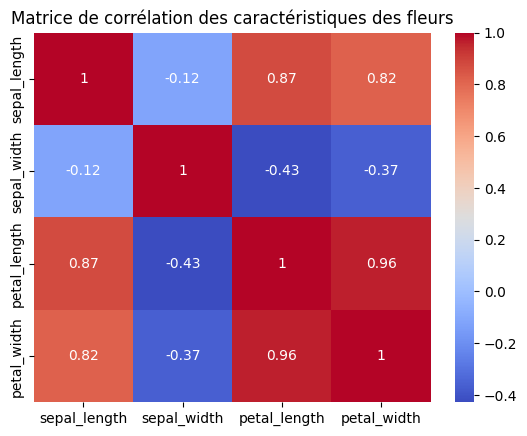

In [8]:
import seaborn as sns

# Importation des données
iris = sns.load_dataset('iris')

# Extraction des colonnes pertinentes
data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Calcul de la matrice de corrélation
corr_matrix = data.corr()

# Visualisation de la matrice de corrélation sous forme de carte de chaleur
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des caractéristiques des fleurs')
plt.show()

À partir de cette matrice de corrélation, nous pouvons voir que la longueur et la largeur des pétales sont fortement corrélées, avec un coefficient de corrélation de 0.96.

Tandis que la largeur des sépales a une faible corrélation avec les autres caractéristiques.

* Cela peut nous aider à choisir les variables à inclure dans une ACP ou dans un modèle de régression en **éliminant les variables fortement corrélées qui peuvent introduire des problèmes de multicollinéarité**.

# Valeurs aberrantes

l'ACP est sensible aux valeurs extrêmes car elle charche à maximiser la variance dans les données. 

Les valeurs aberrantes ont tendance à avoir une variance + élevée que les autres observations, ce qui peut entraîner une distorsion de la structure de covariance des données.

# Méthode du cosinus carré

Cos² = Cosinus carré des variables. 

**Représente la qualité de représentation des variables sur le graphique de l'ACP.**

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Charger les données
df = pd.read_csv('iris.data')
X = df.iloc[:, 0:4].values

# Effectuer l'ACP
pca = PCA()
pca.fit(X)

# Calculer les cosinus carré
cos2 = pca.transform(X)**2 / np.sum(pca.transform(X)**2, axis=0)

# Afficher les cosinus carré
cos2_df = pd.DataFrame(cos2, columns=['PC1', 'PC2', 'PC3', 'PC4'])
cos2_axes_principaux = cos2_df[['PC1', 'PC2']]

print(cos2_axes_principaux)

          PC1       PC2
0    0.012009  0.000741
1    0.013590  0.000475
2    0.012286  0.002581
3    0.012119  0.003218
4    0.008478  0.015777
..        ...       ...
144  0.005963  0.000969
145  0.003650  0.003911
146  0.004900  0.000170
147  0.005703  0.000370
148  0.003022  0.002220

[149 rows x 2 columns]


Les lignes du tableau cos2 correspondent aux observations de notre ensemble de données. Pour chaque observation, les carrés cosinus des angles sont calculés pour chaque axe principal de l'analyse en composantes principales (ACP)

La valeur du cos2 varie de 0 à 1.

une valeur proche de 1 indique que l'observation est bien représentée sur l'axe principal correspondant, c'est-à-dire qu'elle contribue fortement à la variance des données projetées sur cet axe principal. 


En revanche, une valeur proche de 0 indique que l'observation est mal représentée sur l'axe principal correspondant, c'est-à-dire qu'elle a une contribution faible à la variance des données projetées sur cet axe principal.